In [3]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load dataset

df = pd.read_csv("healthcare_noshows.csv")

# Data Cleaning and Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       106987 non-null  int64 
 1   AppointmentID   106987 non-null  int64 
 2   Gender          106987 non-null  object
 3   ScheduledDay    106987 non-null  object
 4   AppointmentDay  106987 non-null  object
 5   Age             106987 non-null  int64 
 6   Neighbourhood   106987 non-null  object
 7   Scholarship     106987 non-null  bool  
 8   Hypertension    106987 non-null  bool  
 9   Diabetes        106987 non-null  bool  
 10  Alcoholism      106987 non-null  bool  
 11  Handcap         106987 non-null  bool  
 12  SMS_received    106987 non-null  bool  
 13  Showed_up       106987 non-null  bool  
 14  Date.diff       106987 non-null  int64 
dtypes: bool(7), int64(4), object(4)
memory usage: 7.2+ MB


In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,29872499824296,5642903,F,29-04-2016,29-04-2016,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,558997776694438,5642503,M,29-04-2016,29-04-2016,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4262962299951,5642549,F,29-04-2016,29-04-2016,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,867951213174,5642828,F,29-04-2016,29-04-2016,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8841186448183,5642494,F,29-04-2016,29-04-2016,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


## Removing duplicate rows

In [7]:
df.drop_duplicates(inplace=True)

## Standardize Text Values

In [8]:
# Text Values are in Neighbourhood

# Removing extra spaces from these values

df["Neighbourhood"] = df["Neighbourhood"].str.strip()

# Converting Education and Marital_Status into Title Case

df["Neighbourhood"] = df["Neighbourhood"].str.title()

## Converting date formats to a consistent type (e.g., mm-dd-yyyy)

In [9]:
#Import required libraries

from datetime import datetime

# Define a function to reformat the dates

def Reformat_Date(Date_Str):
    try:
        # Parse dates and reformat it to MM-DD-YYYY
        return datetime.strptime(Date_Str, "%d-%m-%Y").strftime("%m-%d-%Y")
    except ValueError:
        return None

# Apply the function
df["ScheduledDay"] = df["ScheduledDay"].apply(Reformat_Date)
df["AppointmentDay"] = df["AppointmentDay"].apply(Reformat_Date)

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,29872499824296,5642903,F,04-29-2016,04-29-2016,62,Jardim Da Penha,False,True,False,False,False,False,True,0
1,558997776694438,5642503,M,04-29-2016,04-29-2016,56,Jardim Da Penha,False,False,False,False,False,False,True,0
2,4262962299951,5642549,F,04-29-2016,04-29-2016,62,Mata Da Praia,False,False,False,False,False,False,True,0
3,867951213174,5642828,F,04-29-2016,04-29-2016,8,Pontal De Camburi,False,False,False,False,False,False,True,0
4,8841186448183,5642494,F,04-29-2016,04-29-2016,56,Jardim Da Penha,False,True,True,False,False,False,True,0


## Fixing data types (Converting ScheduledDay and AppointmentDay to datetime)

In [11]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

# Exploratory Data Analysis

## Neighborhood-wise Analysis of No-show Patients

In [12]:
# Count no-show number of patients per neighbourhood

df_no_show = df[df["Showed_up"] == False].groupby("Neighbourhood").size().reset_index(name="No-show Count")

df_no_show = df_no_show.sort_values(by="No-show Count", ascending=False)

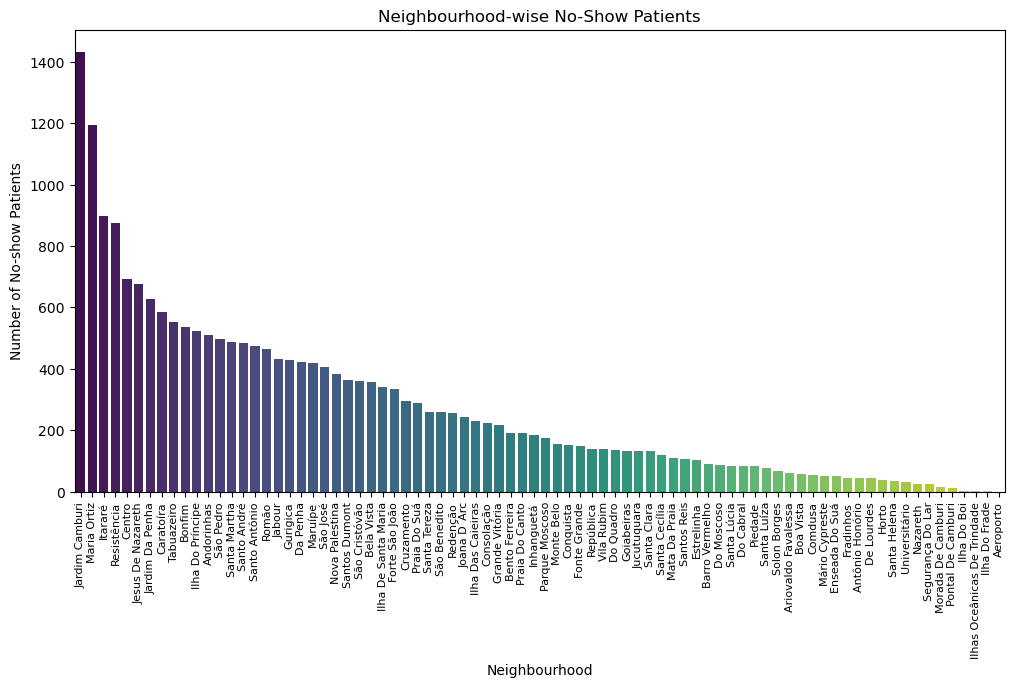

In [13]:
# Plot bar chart

plt.figure(figsize=(12,6))
sns.barplot(data=df_no_show, x="Neighbourhood", y="No-show Count", palette="viridis")
plt.xticks(rotation=90, fontsize=8)

plt.xlabel("Neighbourhood")
plt.ylabel("Number of No-show Patients")
plt.title("Neighbourhood-wise No-Show Patients")

plt.show()

### Observations:

+ There is a highly uneven distribution of no-show patients across neighbourhoods, with some areas experiencing significantly more missed appointments than others.
+ The top few neighbourhoods, such as JARDIM CAMBURI, MARIA ORTIZ, and RESISTÊNCIA, account for a very large number of no-shows compared to the majority of other neighbourhoods.

## Gender-wise Analysis of No-show Patients

In [14]:
# Count no-show number of patients per gender

df_no_show = df[df["Showed_up"] == False].groupby("Gender").size().reset_index(name="No-show Count")

df_no_show = df_no_show.sort_values(by="No-show Count", ascending=False)

df_no_show["Gender"] = df_no_show["Gender"].map({"M":"Male", "F":"Female"})

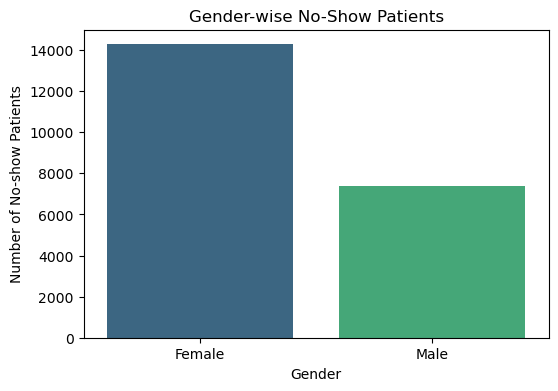

In [15]:
# Plot bar chart

plt.figure(figsize=(6,4))
sns.barplot(data=df_no_show, x="Gender", y="No-show Count", palette="viridis")
plt.xticks(rotation=0, fontsize=10)

plt.xlabel("Gender")
plt.ylabel("Number of No-show Patients")
plt.title("Gender-wise No-Show Patients")

plt.show()

### Observations:
+ The absolute number of no-show patients is significantly higher for females than for males.
+ Approximately twice as many female patients missed their appointments compared to male patients in this dataset.

## Age-wise Analysis of No-show Patients

In [16]:
# Analyzing Age-group bands

bins = [0, 18, 35, 50, 65, df["Age"].max()]
labels = ["0-18", "19-35", "36-50", "51-65", "66+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

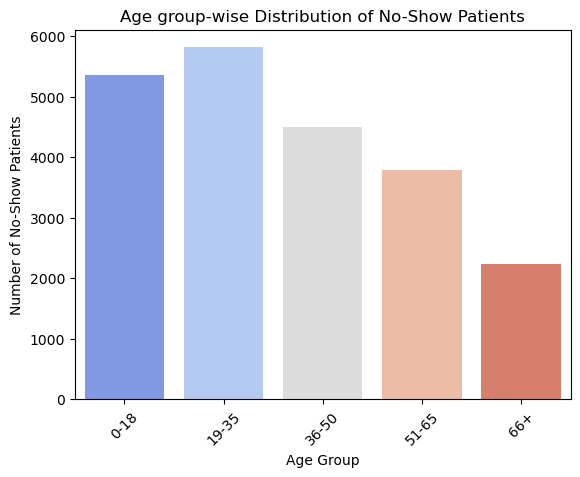

In [17]:
# Visualizing age-wise distribution of No-Show Patients

# Count no-show number of patients age group

df_no_show = df[df["Showed_up"] == False].groupby("AgeGroup").size().reset_index(name="No-show Count")

df_no_show = df_no_show.sort_values(by="No-show Count", ascending=False)

sns.barplot(data=df_no_show, x="AgeGroup", y="No-show Count", palette="coolwarm")
plt.title("Age group-wise Distribution of No-Show Patients")
plt.xlabel("Age Group")
plt.ylabel("Number of No-Show Patients")
plt.xticks(rotation=45)
plt.show()

### Observations:
+ The 19-35 age group stands out as having the single highest count of no-shows, suggesting this demographic might warrant particular attention in strategies to improve attendance.
+ There is a clear trend of decreasing no-show counts as age increases, with the 66+ age group having the lowest number of missed appointments.

## Date Difference (Difference between Scheduled Date and Appointment Date) wise Analysis of No-Show Patients

In [18]:
# Count no-show number of patients per neighbourhood

df_no_show = df[df["Showed_up"] == False].groupby("Date.diff").size().reset_index(name="No-show Count")

df_no_show = df_no_show.sort_values(by="Date.diff", ascending=False)

# Drop rows where the date difference is less than 0

df_no_show = df_no_show[df_no_show["Date.diff"] >= 0].copy()

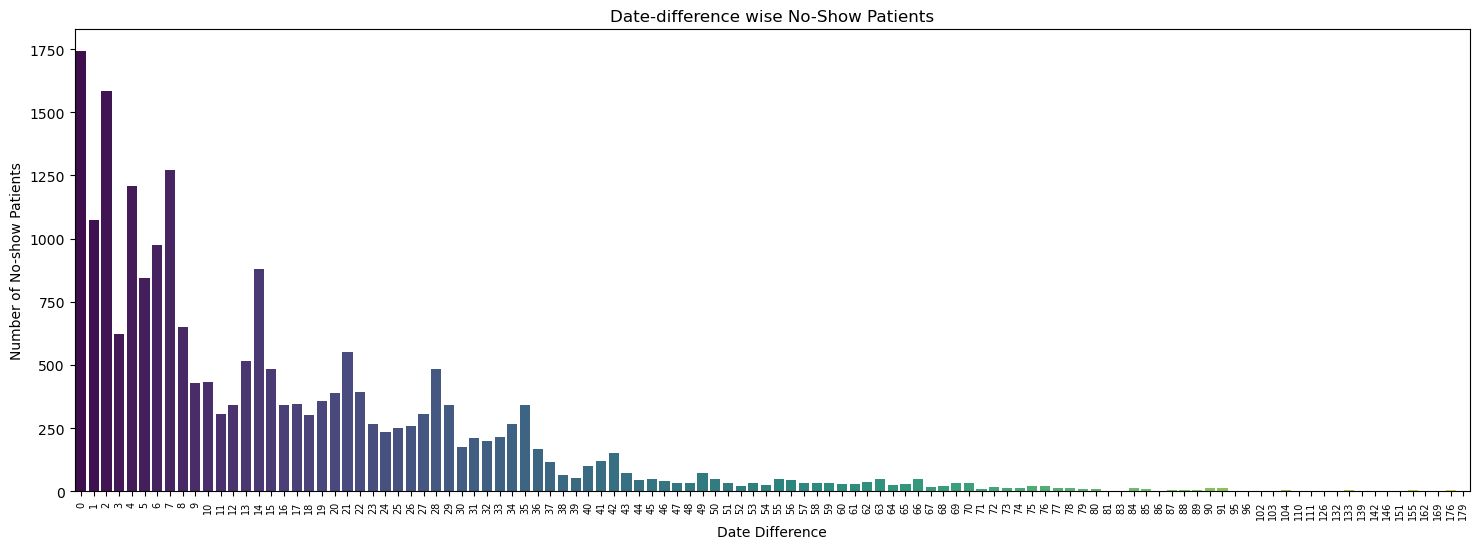

In [19]:
# Plot bar chart

plt.figure(figsize=(18,6))
sns.barplot(data=df_no_show, x="Date.diff", y="No-show Count", palette="viridis")
plt.xticks(rotation=90, fontsize=7)

plt.xlabel("Date Difference")
plt.ylabel("Number of No-show Patients")
plt.title("Date-difference wise No-Show Patients")

plt.show()

### Observations:
+ The highest numbers of no-show appointments occur when the appointment is scheduled on the same day (Date Difference = 0) or just one day before (Date Difference = 1) the appointment day.
+ There is a clear trend where the absolute number of no-shows decreases sharply as the number of days between scheduling and the appointment increases.

## Analysis of No-Show Patients based on SMS Alert Received

In [20]:
# Count no-show number of patients on the basis of SMS Recieved

df_no_show = df[df["Showed_up"] == False].groupby("SMS_received").size().reset_index(name="No-show Count")

df_no_show = df_no_show.sort_values(by="No-show Count", ascending=False)

df_no_show["SMS_received"] = df_no_show["SMS_received"].map({True:"True", False:"False"})

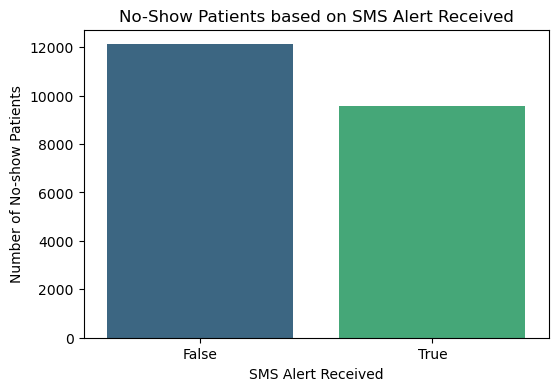

In [21]:
# Plot bar chart

plt.figure(figsize=(6,4))
sns.barplot(data=df_no_show, x="SMS_received", y="No-show Count", palette="viridis")
plt.xticks(rotation=0, fontsize=10)

plt.xlabel("SMS Alert Received")
plt.ylabel("Number of No-show Patients")
plt.title("No-Show Patients based on SMS Alert Received")

plt.show()

### Observations:
+ The absolute number of patients who did not receive an SMS alert and not showed up is higher than the number of patients who did receive an SMS and not showed up.

## Decision Tree Analysis

### On inspecting the database, we can observe that PatientId, AppointmentID do not contribute to patients' showing up.

### Also since we have a Date.Diff column which calculates the number of days between Appointment Scheduled Date and Appointment Date, we do not need to include ScheduledDay and AppointmentDay in our Decision Tree model.

### As Decision Tree cannot handle string values, we will also map the Gender values as 1 for "M" and 0 for "F".

### We will also use Frequency Encoding for Neighbourhood column, for Decision Tree to be able to analyze the impact of this feature on the target value.

In [22]:
# Building a classification model

df_DTree = df

df_DTree["Gender"] = df_DTree["Gender"].map({"M": 1, "F": 0})

# Using Frequency Encoding for "Neighbourhood"

freq_map = df_DTree["Neighbourhood"].value_counts().to_dict()
df_DTree["Neighbourhood"] = df_DTree["Neighbourhood"].map(freq_map)

X = df_DTree.drop(columns=["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "AgeGroup", "Showed_up"])
y= df_DTree["Showed_up"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.72


### Check feature importance of each column.

In [23]:
importance = model.feature_importances_

feature_names = df_DTree.drop(columns=["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "AgeGroup", "Showed_up"]).columns

sorted_indices = np.argsort(importance)[::-1]

for i in sorted_indices:
    print(f"{feature_names[i]}: {importance[i]:.4f}")

Date.diff: 0.3110
Age: 0.2835
Neighbourhood: 0.2725
Gender: 0.0452
Hypertension: 0.0272
Scholarship: 0.0205
SMS_received: 0.0159
Diabetes: 0.0113
Handcap: 0.0075
Alcoholism: 0.0054


### Observations:
+ The Decision Tree classification model built on this dataset achieved an accuracy of 72% in predicting whether a patient will no-show.
+ According to this model, the most important factors influencing a patient's likelihood of no-showing are the time difference between scheduling and the appointment (Date.diff), the patient's Age, and their Neighbourhood. These three features contribute most significantly to the model's predictive power.
+ Conversely, medical conditions (Hypertension, Diabetes, Handicap, Alcoholism) and the receipt of an SMS_received alert appear to be much less important features for predicting no-shows in this model compared to the top three.